### PHYS3600 ID, Fall 2020 - Worksheet 2 - due September 29

#### Please upload to Blackboard the .ipynb file, containing your last name.

#### Original work statement: 

Please write your name here to indicate that your worksheet is the result of your own work, and you have not copied from sources without citing them (this is plagiarism and is not acceptable). Identical or very similar worksheet will share the credit.

#### Your name: Patrice Prosper

In [184]:
#Let's start with our imports!
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

#### 1. Import the data from the file DataHW2.txt

This data set contains three columns for a bi-dimensional data set. They don't have a specific physical meaning.

The first one is the x coordinate.

The second column is the y coordinate.

The third column contains the error on the y coordinate.

Import the data, paying attention to any format issue, as a numpy array with 3 columns.

In [185]:
data = np.round(np.genfromtxt("DataHW2.csv", skip_header=1, delimiter=","),3);
print(data)

[[ 0.000e+00  5.250e+00  1.332e+00]
 [ 1.000e-01  4.080e+00  7.150e-01]
 [ 2.000e-01  4.110e+00 -1.545e+00]
 [ 3.000e-01  9.000e-02 -8.000e-03]
 [ 4.000e-01  1.670e+00  6.210e-01]
 [ 5.000e-01  3.790e+00 -7.200e-01]
 [ 6.000e-01  4.130e+00  2.660e-01]
 [ 7.000e-01  1.220e+00  1.090e-01]
 [ 8.000e-01  3.110e+00  4.000e-03]
 [ 9.000e-01  2.770e+00 -1.750e-01]
 [ 1.000e+00  2.460e+00  4.330e-01]
 [ 1.100e+00  1.100e+00  1.203e+00]
 [ 1.200e+00  4.800e-01 -9.650e-01]
 [ 1.300e+00  2.100e-01  1.028e+00]
 [ 1.400e+00 -6.100e-01  2.290e-01]
 [ 1.500e+00  1.350e+00  4.450e-01]
 [ 1.600e+00  7.400e-01 -1.137e+00]
 [ 1.700e+00  2.820e+00  1.350e-01]
 [ 1.800e+00  1.890e+00  1.485e+00]
 [ 1.900e+00  7.700e-01 -1.080e+00]
 [ 2.000e+00 -2.400e-01 -1.978e+00]
 [ 2.100e+00 -4.710e+00 -1.743e+00]
 [ 2.200e+00  1.180e+00  2.660e-01]
 [ 2.300e+00  1.280e+00  2.385e+00]
 [ 2.400e+00 -1.140e+00  1.124e+00]
 [ 2.500e+00 -1.180e+00  1.673e+00]
 [ 2.600e+00 -1.350e+00  9.900e-02]
 [ 2.700e+00  8.000e-01  1.3

#### Task 2: Make an errorbar plot of this data set.

Place x (first col) on x axis, y (second col) on the y axis, and the error (third col) as the error on y; do not connect the points with a line. We assume that x has no uncertainty for the time being.

Add labels to the axes. 

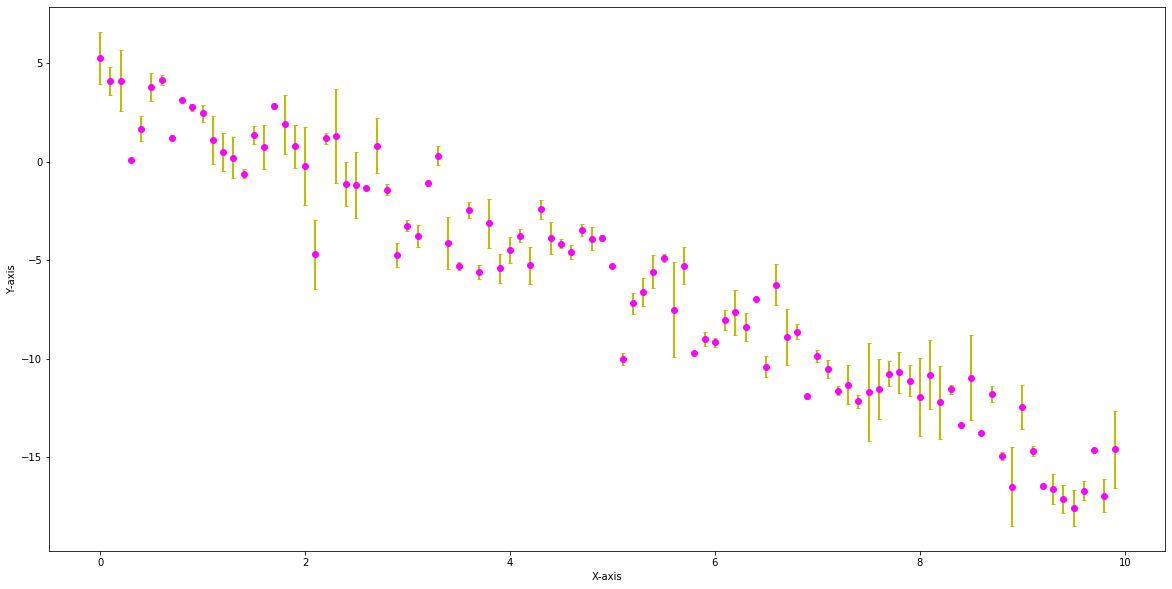

-5.976900000000001
4.95


In [186]:
x = data[:,0]
y= data[:,1]
dy = data[:,2]
plt.figure(figsize=(20,10))
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.errorbar(x, y, yerr=dy,color='magenta', ecolor='y', fmt='o', elinewidth=2, capsize= 2, errorevery=1)
plt.show()
print(y.mean())
print(x.mean())

#### Task 3: Define the model grid.
    
Assume that the data can be fit by a straight line, with parameters slope and intercept.

Pick a suitable range of slopes and intercepts, and justify (explain) your choice. Divide your slope/intercept intervals in 50 points.



In [187]:
from scipy.stats import linregress
linregress(x, y)

LinregressResult(slope=-2.026385238523852, intercept=4.053706930693067, rvalue=-0.9680916844167359, pvalue=1.0435738241995338e-60, stderr=0.05298672629499245)

In [188]:
# m =np.round((x*y.mean() - x.mean()*y.mean()) / ((x**2).mean() - (x.mean())**2),1)
# b = np.round(np.mean(y) - m*np.mean(x),1)

slopes = np.linspace(-3, 0, 50)
intercepts = np.linspace(3,6,50)

print('slopes range\n', slopes,'\n' 'intercepts range\n', intercepts)


slopes range
 [-3.         -2.93877551 -2.87755102 -2.81632653 -2.75510204 -2.69387755
 -2.63265306 -2.57142857 -2.51020408 -2.44897959 -2.3877551  -2.32653061
 -2.26530612 -2.20408163 -2.14285714 -2.08163265 -2.02040816 -1.95918367
 -1.89795918 -1.83673469 -1.7755102  -1.71428571 -1.65306122 -1.59183673
 -1.53061224 -1.46938776 -1.40816327 -1.34693878 -1.28571429 -1.2244898
 -1.16326531 -1.10204082 -1.04081633 -0.97959184 -0.91836735 -0.85714286
 -0.79591837 -0.73469388 -0.67346939 -0.6122449  -0.55102041 -0.48979592
 -0.42857143 -0.36734694 -0.30612245 -0.24489796 -0.18367347 -0.12244898
 -0.06122449  0.        ] 
intercepts range
 [3.         3.06122449 3.12244898 3.18367347 3.24489796 3.30612245
 3.36734694 3.42857143 3.48979592 3.55102041 3.6122449  3.67346939
 3.73469388 3.79591837 3.85714286 3.91836735 3.97959184 4.04081633
 4.10204082 4.16326531 4.2244898  4.28571429 4.34693878 4.40816327
 4.46938776 4.53061224 4.59183673 4.65306122 4.71428571 4.7755102
 4.83673469 4.89795918 4

#### Task 4: Define a function for the model response, and  the squared error function. 
    
Setting aside the uncertainties for the moment, define the a function that returns the model prediction for the y coordinate of the line as a function of slope and intercept, and a function that returns the square error of the model, summed over all data points (this mirrors closely what we did in the notebook in class!) 
    

In [189]:
def model(x,m,b):
    return m*x+b 

def se(m,b,x,y):
    return ((model(x,m,b) - y)**2).sum()
#print('square error is', se(m,b,x,y))

#### Task 5: Calculate the square error for all the combinations, and find the best fit model.

Calculate the square error for all the combinations, and from there find the minimum square error value, and the values of slope and intercept that correspond to it (i.e., the parameters of the best fit model).

In [190]:
sqr_errs = np.array([[se(m,b,x,y) for b in intercepts] for m in slopes]) 
#print(sqr_errs)

In [191]:
print(sqr_errs.shape) 
print(sqr_errs.size)
print(sqr_errs.min())
print(sqr_errs.argmin())
indices = np.unravel_index(sqr_errs.argmin(),sqr_errs.shape)
print(indices)  
bm=slopes[indices[0]]
bb=intercepts[indices[1]]
print('minimum square errors','x=', bm, 'y=', bb)

(50, 50)
2500
229.32148992086633
817
(16, 17)
minimum square errors x= -2.020408163265306 y= 4.040816326530612


#### Task 6: Plot the best fit line, and the data points, in a scatter plot.

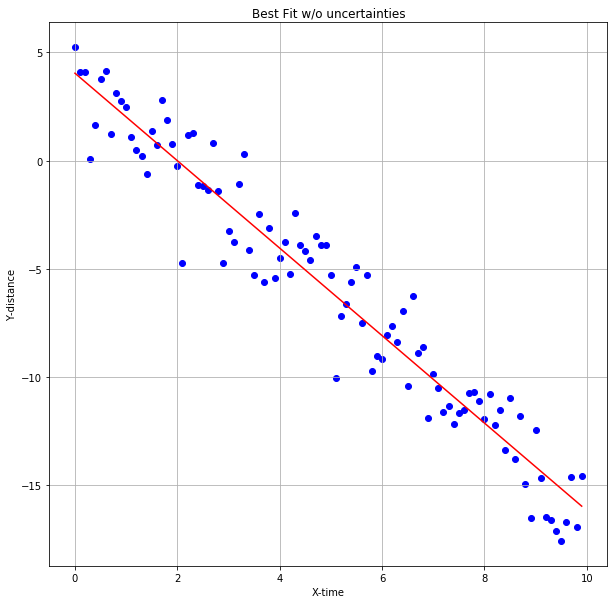

In [192]:
#model = LinearRegression(fit_intercept=True)
#model.fit(x[:, np.newaxis], y)
#y2 = model.predict(x[:, np.newaxis]) #checking
y2= bb + bm * x 

plt.figure(figsize=(10,10))
plt.title("Best Fit w/o uncertainties")
plt.xlabel("X-time")
plt.ylabel("Y-distance")
plt.scatter(x, y, c='blue')
plt.plot(x, y2, color='red');
plt.grid()
plt.rcParams.update({'font.size': 15})

#### Task 7: Now define a new function, called e.g. chisquare, that adds inverse weighing of the uncertainties dy. 

It will take an additional argument compared to the square error function. Refer to the slides if you need help!

In [193]:
def chisquare(x,m,b,y,dy):
    sigma = dy
    return np.sum((y-(b+m*x))**2/sigma**2)

In [194]:
print(dy)

[ 1.332  0.715 -1.545 -0.008  0.621 -0.72   0.266  0.109  0.004 -0.175
  0.433  1.203 -0.965  1.028  0.229  0.445 -1.137  0.135  1.485 -1.08
 -1.978 -1.743  0.266  2.385  1.124  1.673  0.099  1.398 -0.271  0.613
 -0.267 -0.549  0.133 -0.476  1.308  0.195  0.4   -0.338  1.256 -0.732
  0.66  -0.351 -0.939 -0.489 -0.805 -0.213 -0.339  0.312  0.565 -0.147
 -0.026  0.289 -0.54   0.708  0.842  0.204  2.395  0.917 -0.112 -0.362
 -0.232 -0.502  1.129 -0.698 -0.081 -0.529  1.046 -1.419 -0.362 -0.122
  0.319  0.461 -0.216  0.989  0.315  2.468 -1.508  0.621 -1.045 -0.798
  1.985  1.745 -1.856 -0.223 -0.066 -2.132 -0.049  0.393  0.217 -1.994
  1.108  0.245 -0.062 -0.754  0.712  0.918 -0.482  0.09   0.827 -1.955]


#### Task 8: Calculate the chi square for all the models in the grid, and again find the best fit model (slope and intercept of the best fitting line).

In [195]:
chisqr_errs=np.array([[chisquare(x,m,b,y,dy) for m in slopes] for b in intercepts])

print(chisqr_errs.min())
print(chisqr_errs.argmin())
indices = np.unravel_index(chisqr_errs.argmin(),chisqr_errs.shape)
print(indices)  
bm2=slopes[indices[0]]
bb2=intercepts[indices[1]]
print('minimum square errors','x=', bm2, 'y=', bb2)

201989.9171115847
620
(12, 20)
minimum square errors x= -2.2653061224489797 y= 4.224489795918368


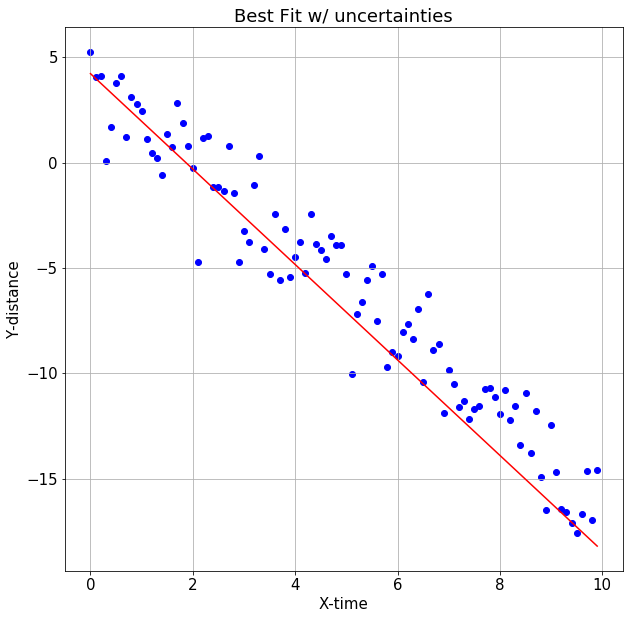

In [196]:
y3= bb2 + bm2 * x 

plt.figure(figsize=(10,10))
plt.title("Best Fit w/ uncertainties")
plt.xlabel("X-time")
plt.ylabel("Y-distance")
plt.scatter(x, y, c='blue')
plt.plot(x, y3, color='red');

plt.grid()
plt.rcParams.update({'font.size': 15})



#### Task 9: Answer the questions. 

Did the best fit change? Why or why not? Which one is a better estimate of the best fit line, the one you obtained in 7 or this one? Why?  

The best fit did change very much. Though not entirely visible on the graph, the value of the least error for slopes and 
intercepts did chamge from -2.02 to -2.04 and 4.05 to 4.0 respectively. The best fit with uncertainties seems to be a 
better fit line since it is touching several more points than the fit line wiothout the uncertainties.

#### Task 10. Repeat the operations of 3. and 5. using 100 values for each variable, instead of 50.

Also answer: Does the best fit change? If so, do you think the change is significant or negligible? Why?

(100, 100)
10000
229.27720858075705
9607
(96, 7)
minimum square errors x= -2.0303030303030303 y= 4.070707070707071


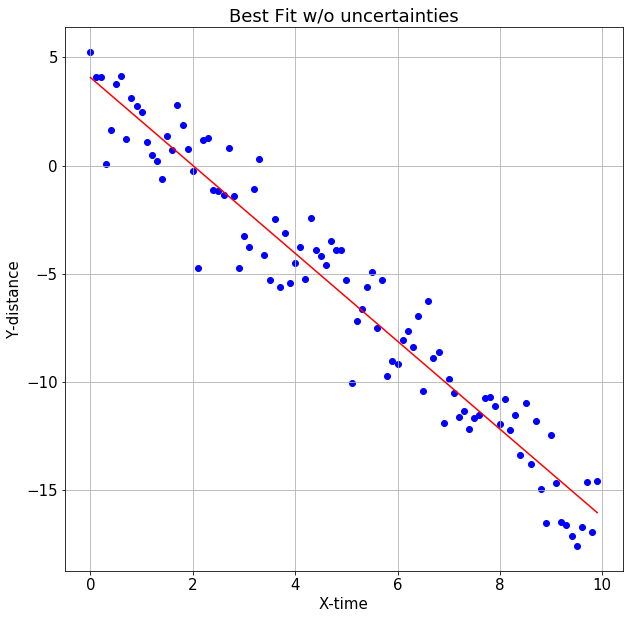

In [198]:
slopes2 = np.linspace(-3, -2, 100)
intercepts2 = np.linspace(4,5,100)

sqr_errs2 = np.array([[se(m,b,x,y) for b in intercepts2] for m in slopes2]) 


print(sqr_errs2.shape) 
print(sqr_errs2.size)
print(sqr_errs2.min())
print(sqr_errs2.argmin())
indices2 = np.unravel_index(sqr_errs2.argmin(),(sqr_errs2.shape))
print(indices2)  
bm3=slopes2[indices2[0]]
bb3=intercepts2[indices2[1]]

print('minimum square errors','x=', bm3, 'y=', bb3)
y4= bb3 + bm3 * x 

plt.figure(figsize=(10,10))
plt.title("Best Fit w/o uncertainties")
plt.xlabel("X-time")
plt.ylabel("Y-distance")
plt.scatter(x, y, c='blue')
plt.plot(x, y4, color='red');
plt.grid()
plt.rcParams.update({'font.size': 15})


There is not much change in the least squared error although the slope decreased by -.01 and intecept increased by .05
While visibly there is seems to be no significant change in the graph, the best fit line passes through fewer points
Therefore the change can not be negligible 

####  Task 11. Keeping the intercept fixed at 4.0, plot the chi square function as a function of the slope value. 

The slope will be on the x axis and vary in the interval you previously chose. What is the shape of the curve? 

In [246]:
chis = np.array([chisquare(x,m,4,y,dy) for m in slopes])
print(chis)
print(min(chis))

[431772.18555074 407253.91245526 384144.34441183 362443.48142044
 342151.32348111 323267.87059382 305793.12275859 289727.07997541
 275069.74224427 261821.10956519 249981.18193816 239549.95936318
 230527.44184024 222913.62936936 216708.52195053 211912.11958375
 208524.42226902 206545.43000634 205975.1427957  206813.56063712
 209060.68353059 212716.51147611 217781.04447368 224254.2825233
 232136.22562497 241426.87377869 252126.22698446 264234.28524228
 277751.04855215 292676.51691407 309010.69032804 326753.56879406
 345905.15231214 366465.44088226 388434.43450443 411812.13317865
 436598.53690492 462793.64568324 490397.45951362 519409.97839604
 549831.20233051 581661.13131703 614899.76535561 649547.10444623
 685603.1485889  723067.89778363 761941.3520304  802223.51132922
 843914.3756801  887013.94508302]
205975.1427957048


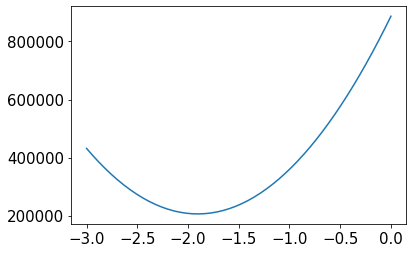

In [201]:
plt.plot( slopes, chis )

The curve is parabolic and and inverse to the normallized gaussuian dustribution. It shouws that the least error can be 
#can be found when the slope is at -1.8 for the intercept of 4.

#### Task 12. Extra credit.

After looking at 13, could you suggest a way to find the slope corresponding to the minimum chi square without having to explore the whole grid of parameters?

In [434]:
import scipy.optimize as opt

f = np.poly1d(chis)
opt.fmin_bfgs(f,[0], maxiter=2500,full_output=True)
print(format(xopt))

         Current function value: -2245452961179607518331884125331861002070594579858568196448242857199848831644326427553728471141320911047206388465268648959750043291106338749415341523206144.000000
         Iterations: 1
         Function evaluations: 348
         Gradient evaluations: 112
(array([-1034.24]), array([-2.24545296e+153]), array([1.06386518e+152]), array([[-9.72153254e-150]]), 348, 112, 2)


C:\Users\patri\anaconda3\lib\site-packages\numpy\lib\polynomial.py:736: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]
C:\Users\patri\anaconda3\lib\site-packages\scipy\optimize\optimize.py:697: RuntimeWarning: invalid value encountered in subtract
  df = (f(*((xk + d,) + args)) - f0) / d[k]


My thought process was to find the minimum chis values and using that plug it into the chiasquare function to get back the x 
values I ran into problems; getting the error messages "TypeError: 'numpy.ndarray' object is not callable". Then I did some reaserach 
and found this scipy optimizer which could give back the slope from minimum chis without having to look at every point. Clearly
I am doing something incorrectly as the values are way too small.

References:
https://www.dataquest.io/blog/pandas-concatenation-tutorial/ 
https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/8-chi-squared-tests https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html
https://docs.scipy.org/doc/scipy/reference/optimize.html